In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv('data/train.csv',  index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Аналитика выживания

In [26]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Доля выживших, среди всех мужчин на борту: 0.18890814558058924
Доля выживших, среди всех женщин на борту: 0.7420382165605095


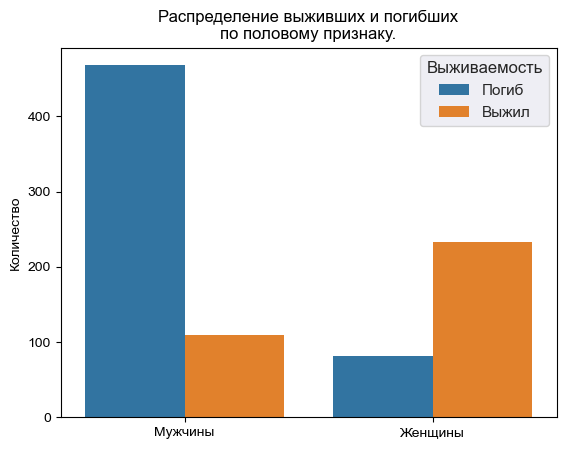

In [30]:
print(f'Доля выживших, среди всех мужчин на борту: ', end='')
print(df[(df['Sex'] == "male") & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == "male"].shape[0] )
print(f'Доля выживших, среди всех женщин на борту: ', end='')
print(df[(df['Sex'] == "female") & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == "female"].shape[0] )
g = sns.countplot(df, x='Sex', hue='Survived')
sns.set (rc={"figure.figsize":(8, 4)})
plt.title('Распределение выживших и погибших\nпо половому признаку.')
plt.ylabel('Количество')
plt.xlabel('')
plt.legend(title='Выживаемость', labels=["Погиб","Выжил"])
g.set_xticklabels(['Мужчины', 'Женщины'])
plt.show()

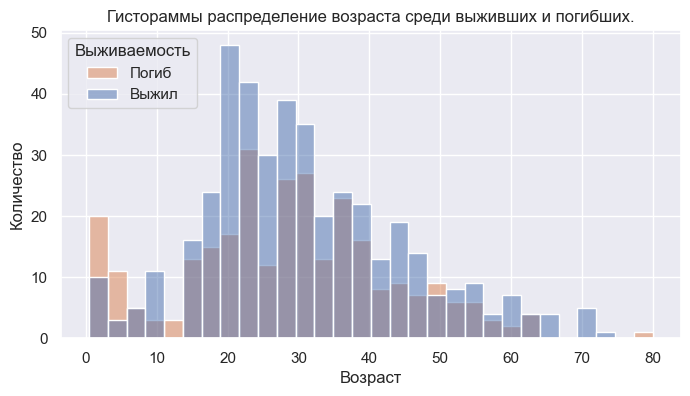

In [31]:
sns.histplot(df, x='Age', hue='Survived', bins=30)
plt.title('Гистораммы распределение возраста среди выживших и погибших.')
plt.ylabel('Количество')
plt.xlabel('Возраст')
plt.legend(title='Выживаемость', labels=["Погиб","Выжил"], loc='upper left')
plt.show()

Доля выживших, среди пассажиров 1 класса: 0.6296296296296297
Доля выживших, среди пассажиров 2 класса: 0.47282608695652173
Доля выживших, среди пассажиров 3 класса: 0.24236252545824846


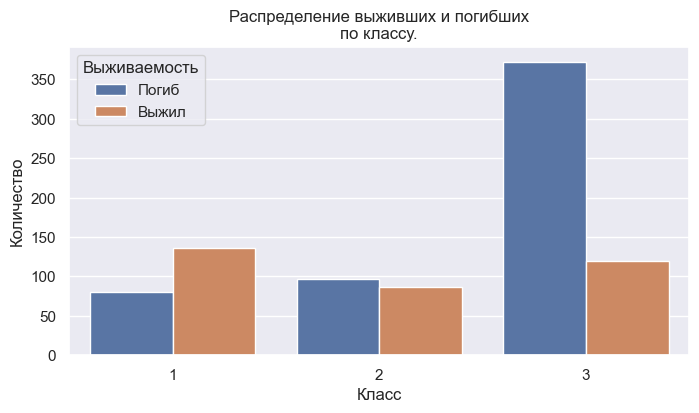

In [32]:
for class_num in range(1, 4):
    print(f'Доля выживших, среди пассажиров {class_num} класса: ', end='')
    print(df[(df['Pclass'] == class_num) & (df['Survived'] == 1)].shape[0] / df[df['Pclass'] == class_num].shape[0] )
plt.title('Распределение выживших и погибших\nпо классу.')
g = sns.countplot(df, x='Pclass', hue='Survived')
plt.ylabel('Количество')
plt.xlabel('Класс')
plt.legend(title='Выживаемость', labels=["Погиб","Выжил"])
plt.show()

In [44]:
pd.crosstab(df.Pclass, 
            df.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='age_groups', ylabel='count'>

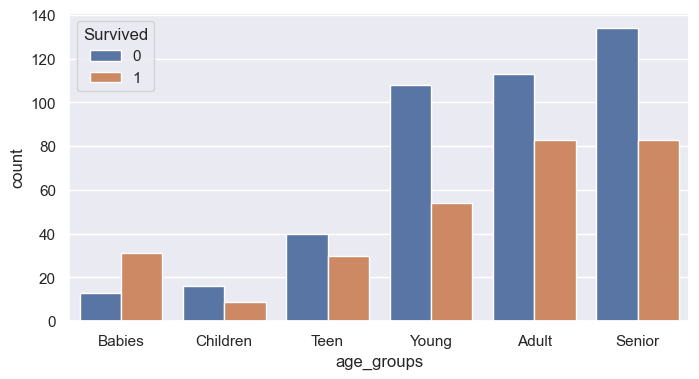

In [43]:
sns.countplot(df, x='age_groups', hue='Survived')

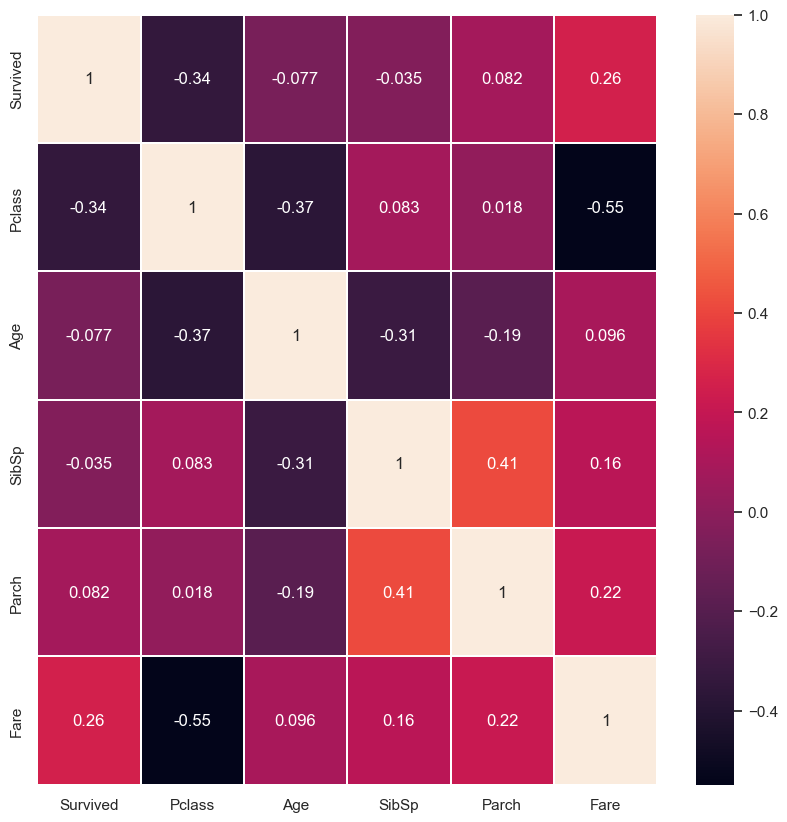

In [45]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=.1)
plt.show()

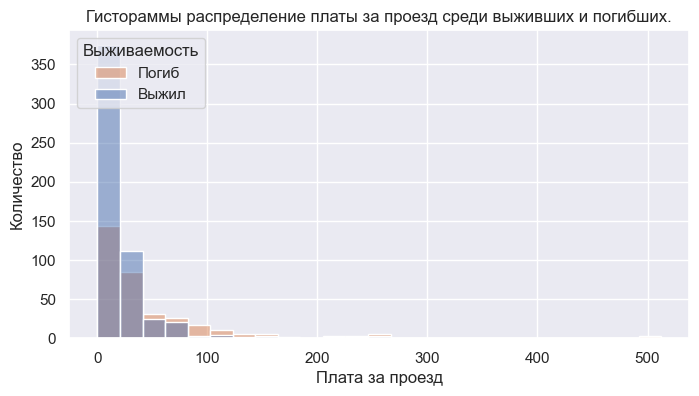

In [46]:
sns.histplot(df, x='Fare', hue='Survived', bins=25)
plt.title('Гистораммы распределение платы за проезд среди выживших и погибших.')
plt.ylabel('Количество')
plt.xlabel('Плата за проезд')
plt.legend(title='Выживаемость', labels=["Погиб", "Выжил"], loc='upper left')
plt.show()